In [ ]:
!pip install mysql-connector

     |████████████████████████████████| 11.9MB 347kB/s 
  Created wheel for mysql-connector: filename=mysql_connector-2.2.9-cp36-cp36m-linux_x86_64.whl size=247950 sha256=f470b246e96c6869abdffb2e903dd2ff1a67bf9b131ab221bb641f394dbb9585
  Stored in directory: /root/.cache/pip/wheels/8c/83/a1/f8b6d4bb1bd6208bbde1608bbfa7557504bed9eaf2ecf8c175
Successfully built mysql-connector


In [ ]:
import cv2
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

 
def segmentation(img):
  
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    pixel_number = gray.shape[0] * gray.shape[1]
    mean_weight = 1.0 / pixel_number
    his, bins = np.histogram(gray, np.array(range(0, 256)))
    final_thresh = -1
    final_value = -1
    for t in bins[1:-1]:
        wb = np.sum(his[:t]) * mean_weight
        wf = np.sum(his[t:]) * mean_weight

        mub = np.mean(his[:t])
        muf = np.mean(his[t:])
        value = wb * wf * (mub - muf) ** 2
 
        if value > final_value:
            final_thresh = t
            final_value = value
    final_img = gray.copy()

    final_img[gray > final_thresh] = 255
    final_img[gray <= final_thresh] = 0
   
 
    final_img = cv2.equalizeHist(final_img)
    _, thresh = cv2.threshold(final_img, 0, final_thresh, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    img_contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[-2]
    img_contours = sorted(img_contours, key=cv2.contourArea)
    mask = np.zeros(img.shape[:2], np.uint8)
 
    for i in img_contours:
        mask = np.zeros(img.shape[:2], np.uint8)
        cv2.drawContours(mask, [i], -1, 255, -1)
 
    new_img = cv2.bitwise_and(img, img, mask=mask)
    return new_img
 

In [ ]:
def segmentation1(img):

        GRAY_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        _, thresh = cv2.threshold(GRAY_img,0, 255,cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
        img_contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[-2]
        img_contours = sorted(img_contours, key=cv2.contourArea)
        for i in img_contours:
            if cv2.contourArea(i) > 100:
                break

        mask = np.zeros(img.shape[:2], np.uint8)
        cv2.drawContours(mask, [i], -1, 255, -1)
        new_img = cv2.bitwise_and(img, img, mask=mask)
        return new_img

In [ ]:
from google.colab import files
upload=files.upload()



Saving finaldata.py to finaldata.py
Saving gy.jpg to gy.jpg
Saving sample.db to sample.db


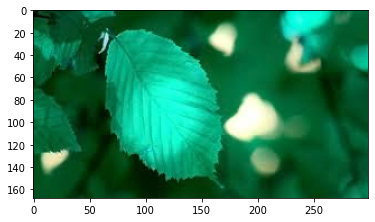

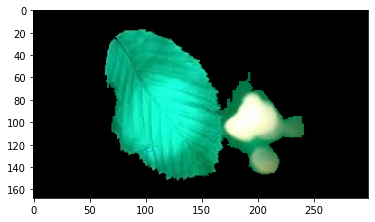

13817


In [ ]:
img = cv2.imread("gy.jpg")
plt.imshow(img)
plt.show()

k1=segmentation(img)
gray1 = cv2.cvtColor(k1,cv2.COLOR_BGR2GRAY)
ret, thresh1 = cv2.threshold(gray1,0,255,cv2.THRESH_BINARY)
count1 = cv2.countNonZero(thresh1)

k2=segmentation1(img)
gray2 = cv2.cvtColor(k2,cv2.COLOR_BGR2GRAY)
ret, thresh2 = cv2.threshold(gray2,0,255,cv2.THRESH_BINARY)
count2 = cv2.countNonZero(thresh2)


if(count1>count2):
  k=k1
  plt.imshow(k1)
  plt.show()
  print(count1)
  final=count1

else:
  k=k2
  plt.imshow(k2)
  plt.show()
  print(count2)
  final=count2

Average Intensity   : 10.628
Damaged Area Approx : 25.46 % 

10.627647714604237


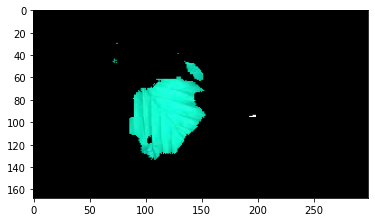

Disease Name:  Chlorosis (Discoloration)


In [ ]:
import finaldata
hsv = cv2.cvtColor(k, cv2.COLOR_BGR2HSV)

## mask of green (36,25,25) ~ (86, 255,255)
#mask = cv2.inRange(hsv, (36, 25, 25), (86, 255,255))
mask = cv2.inRange(hsv, (15,0,0), (36, 255,255))

## slice the green
imask = mask>0
green = np.zeros_like(k, np.uint8)
green[imask] = k[imask]


## save 
cv2.imwrite("green.png", green)
grayfinal = cv2.cvtColor(green,cv2.COLOR_BGR2GRAY)
ret, thresh3 = cv2.threshold(grayfinal,0,255,cv2.THRESH_BINARY)
count3 = cv2.countNonZero(thresh3)

i1=np.mean(green)
print("Average Intensity   :",round(i1,3))
print("Damaged Area Approx :",round((count3*100/final),2),"%","\n")
print(i1)

plt.imshow(green)
plt.show()

finaldata.d1(i1)

**Capture Photo**

In [ ]:
import cv2

videoCaptureObject = cv2.VideoCapture(0)
result = True
while(result):
    ret,frame = videoCaptureObject.read()
    cv2.imwrite("NewPicture.jpg",frame)
    result = False
videoCaptureObject.release()
cv2.destroyAllWindows()

**Capture Photo in Google Coolab**

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

    
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);


      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  

  display(Image(filename))
except Exception as err:

  print(str(err))

**Picamera**

In [ ]:
from picamera.array import PiRGBArray
from picamera import PiCamera
import time
import cv2
camera = PiCamera()
rawCapture = PiRGBArray(camera)
time.sleep(0.1)
camera.capture(rawCapture, format="bgr")
image = rawCapture.array
cv2.imshow("Image", image)
cv2.waitKey(0)
